In [1]:
!pip install torchview

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# import numpy for math calculations
import numpy as np

# import pandas for data (csv) manipulation
import pandas as pd

# import gc to collect garbage
import gc

import opendatasets as od

# import matplotlib for plotting
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('fivethirtyeight') 
%matplotlib inline

# import seaborn for more plotting options(built on top of matplotlib)
import seaborn as sns

# import librosa for analysing audio signals : visualize audio, display the spectogram
import librosa
import soundfile as sf

# import librosa for analysing audio signals : visualize audio, display the spectogram
import librosa.display


# import wav for reading and writing wav files
import wave

# import IPython.dispaly for playing audio in Jupter notebook
import IPython.display as ipd

# import os for system operations
import os

# import random for get random values/choices
import random

# import sklearn for machine learning modelling and preprocessing
import sklearn


# importing from sklearn the evaluation metrics for classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix

# importing from sklearn model selection 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, learning_curve


# Import PyTorch libraries
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchsummary import summary
from torchview import draw_graph

from pathlib import Path
import torchaudio
print("Libraries imported - ready to use PyTorch", torch.__version__)

# import tqdm to show a smart progress meter
from tqdm.notebook import trange,tqdm

# import warnings to hide the unnessairy warniings
import warnings
warnings.filterwarnings('ignore')

Libraries imported - ready to use PyTorch 2.0.0+cu118


In [4]:
od.download("https://www.kaggle.com/datasets/mmoreaux/environmental-sound-classification-50")

Skipping, found downloaded files in "./environmental-sound-classification-50" (use force=True to force download)


In [5]:
import random 
SEED = 42
def seed_everything(seed=42): 
    random.seed(seed) 
    os.environ['PYTHONHASHSEED'] = str(seed) 
    np.random.seed(seed) 
seed_everything(SEED)

In [6]:
# To get a list of the pathes of all the audio files
data = "./environmental-sound-classification-50/audio/audio/44100/"
dataset = pd.read_csv('./environmental-sound-classification-50/esc50.csv')
all_files = []
for path, subdirs, files in os.walk(data):
    for name in files:
        all_files.append(os.path.join(path, name))
        

# A dictionary to decode the categories into targets
decoder = {0: 'dog', 14: 'chirping_birds', 36: 'vacuum_cleaner', 19: 'thunderstorm', 30: 'door_wood_knock',
           34: 'can_opening', 9: 'crow', 22: 'clapping', 48: 'fireworks', 41: 'chainsaw', 47: 'airplane', 
           31: 'mouse_click', 17: 'pouring_water', 45: 'train', 8: 'sheep', 15: 'water_drops', 46: 'church_bells', 
           37: 'clock_alarm', 32: 'keyboard_typing', 16: 'wind', 25: 'footsteps', 4: 'frog', 3: 'cow', 
           27: 'brushing_teeth', 43: 'car_horn', 12: 'crackling_fire', 40: 'helicopter', 29: 'drinking_sipping', 
           10: 'rain', 7: 'insects', 26: 'laughing', 6: 'hen', 44: 'engine', 23: 'breathing', 20: 'crying_baby', 
           49: 'hand_saw', 24: 'coughing', 39: 'glass_breaking', 28: 'snoring', 18: 'toilet_flush', 2: 'pig', 
           35: 'washing_machine', 38: 'clock_tick', 21: 'sneezing', 1: 'rooster', 11: 'sea_waves', 42: 'siren', 
           5: 'cat', 33: 'door_wood_creaks', 13: 'crickets'}


# A dictionary to encode the categories into targets
encoder = {'dog': 0, 'chirping_birds': 14, 'vacuum_cleaner': 36, 'thunderstorm': 19, 'door_wood_knock': 30, 
           'can_opening': 34, 'crow': 9, 'clapping': 22, 'fireworks': 48, 'chainsaw': 41, 'airplane': 47, 
           'mouse_click': 31, 'pouring_water': 17, 'train': 45, 'sheep': 8, 'water_drops': 15, 'church_bells': 46, 
           'clock_alarm': 37, 'keyboard_typing': 32, 'wind': 16, 'footsteps': 25, 'frog': 4, 'cow': 3, 'brushing_teeth': 27, 
           'car_horn': 43, 'crackling_fire': 12, 'helicopter': 40, 'drinking_sipping': 29, 'rain': 10, 'insects': 7, 
           'laughing': 26, 'hen': 6, 'engine': 44, 'breathing': 23, 'crying_baby': 20, 'hand_saw': 49, 'coughing': 24, 
           'glass_breaking': 39, 'snoring': 28, 'toilet_flush': 18, 'pig': 2, 'washing_machine': 35, 'clock_tick': 38, 
           'sneezing': 21, 'rooster': 1, 'sea_waves': 11, 'siren': 42, 'cat': 5, 'door_wood_creaks': 33, 'crickets': 13}

In [7]:
plot_files = random.choices(all_files, k = 10)
plot_audios = [librosa.load(plot_files[i]) for i in range(10)]

In [8]:
# Importing 1 file
y, sr = librosa.load(data + "1-100210-A-36.wav")

print('y:', y, '\n')
print('y shape:', np.shape(y), '\n')
print('Sample Rate (KHz):', sr, '\n')

# The duration is equal to the number of frames divided by the framerate
print('Duration of the audio file:', np.shape(y)[0]/sr, 'second')

y: [-0.0065937  -0.01193068 -0.00302179 ... -0.01349506  0.3618797
 -0.06048191] 

y shape: (110250,) 

Sample Rate (KHz): 22050 

Duration of the audio file: 5.0 second


In [9]:
ipd.Audio(data + "1-100210-B-36.wav")

Exploratory Data Analysis

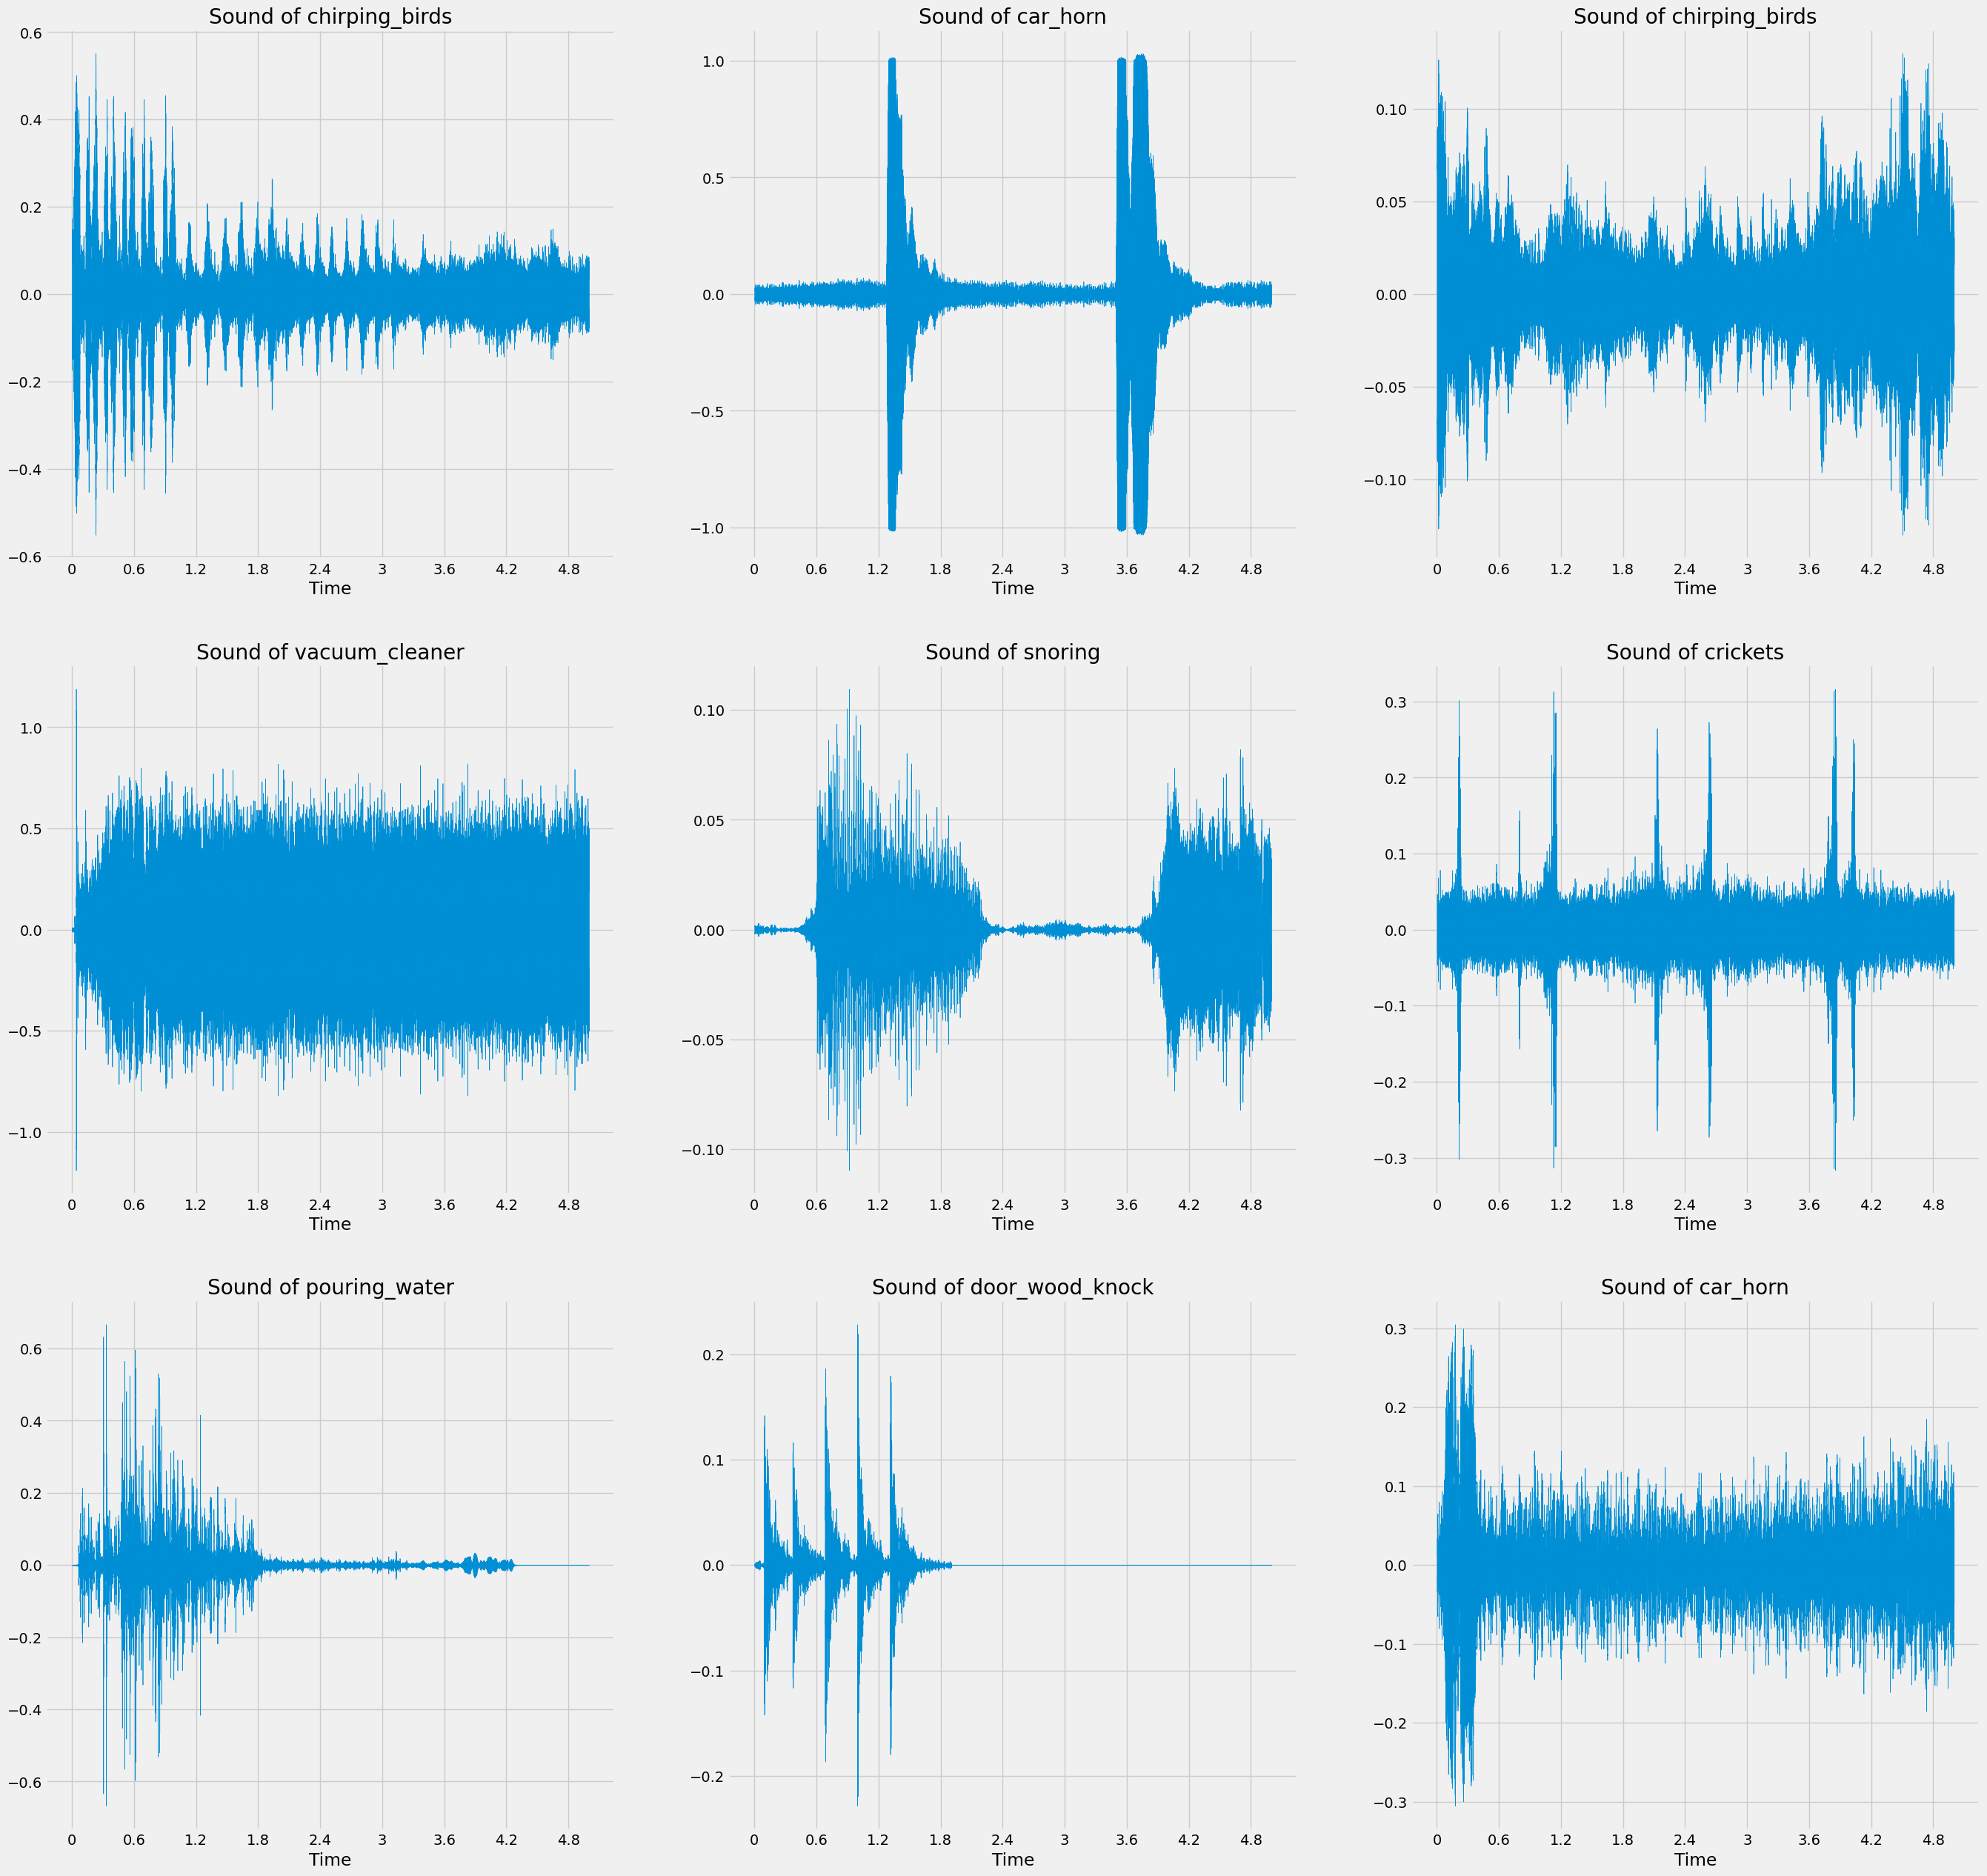

In [ ]:
plt.figure(figsize=(30,30))
for i in range(1,10):
    plt.subplot(3,3,i)
    librosa.display.waveshow(plot_audios[i][0])
    try:
        plt.title("Sound of " + decoder[int(plot_files[i][-6:-4])] )
    except:
        plt.title("Sound of " + decoder[int(plot_files[i][-5:-4])] )

Spectrogram

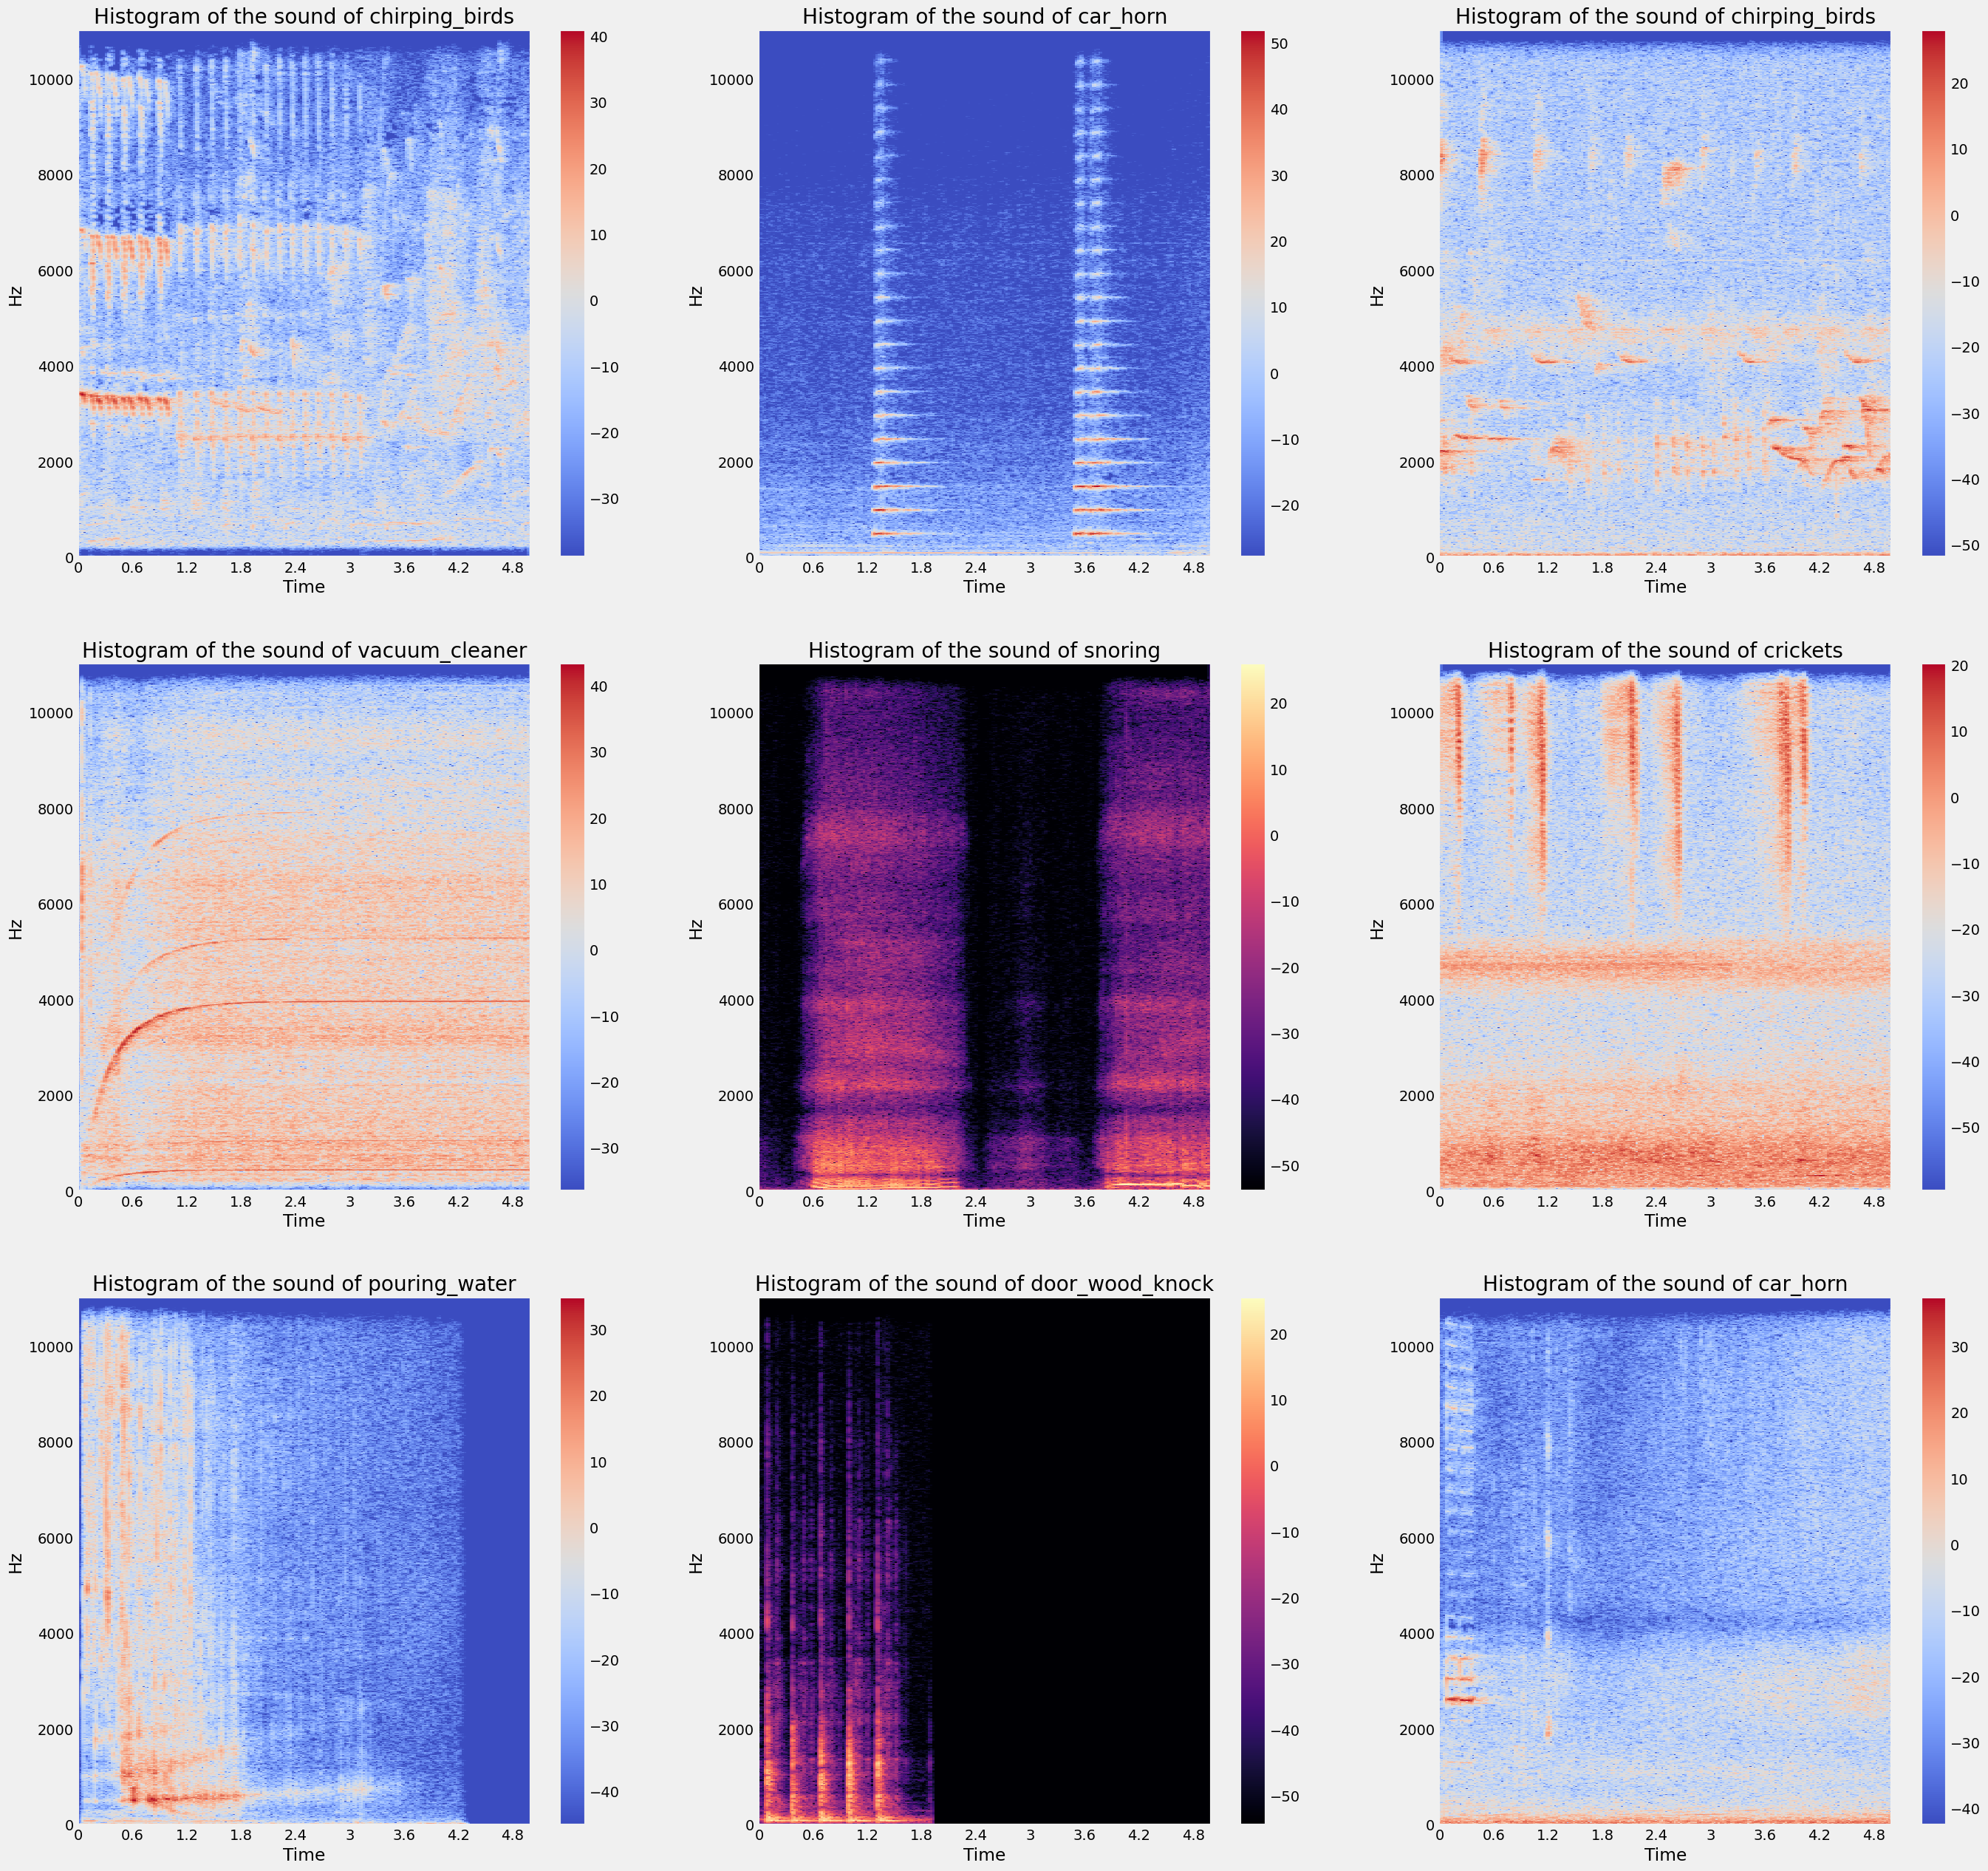

In [11]:
plt.figure(figsize=(30,30))
for i in range(1,10):
    plt.subplot(3,3,i)
    X = librosa.stft(plot_audios[i][0])
    Xdb = librosa.amplitude_to_db(abs(X))
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()
    try:
        plt.title("Histogram of the sound of " + decoder[int(plot_files[i][-6:-4])] )
    except:
        plt.title("Histogram of the sound of " + decoder[int(plot_files[i][-5:-4])] )

Zero Crossing Rate

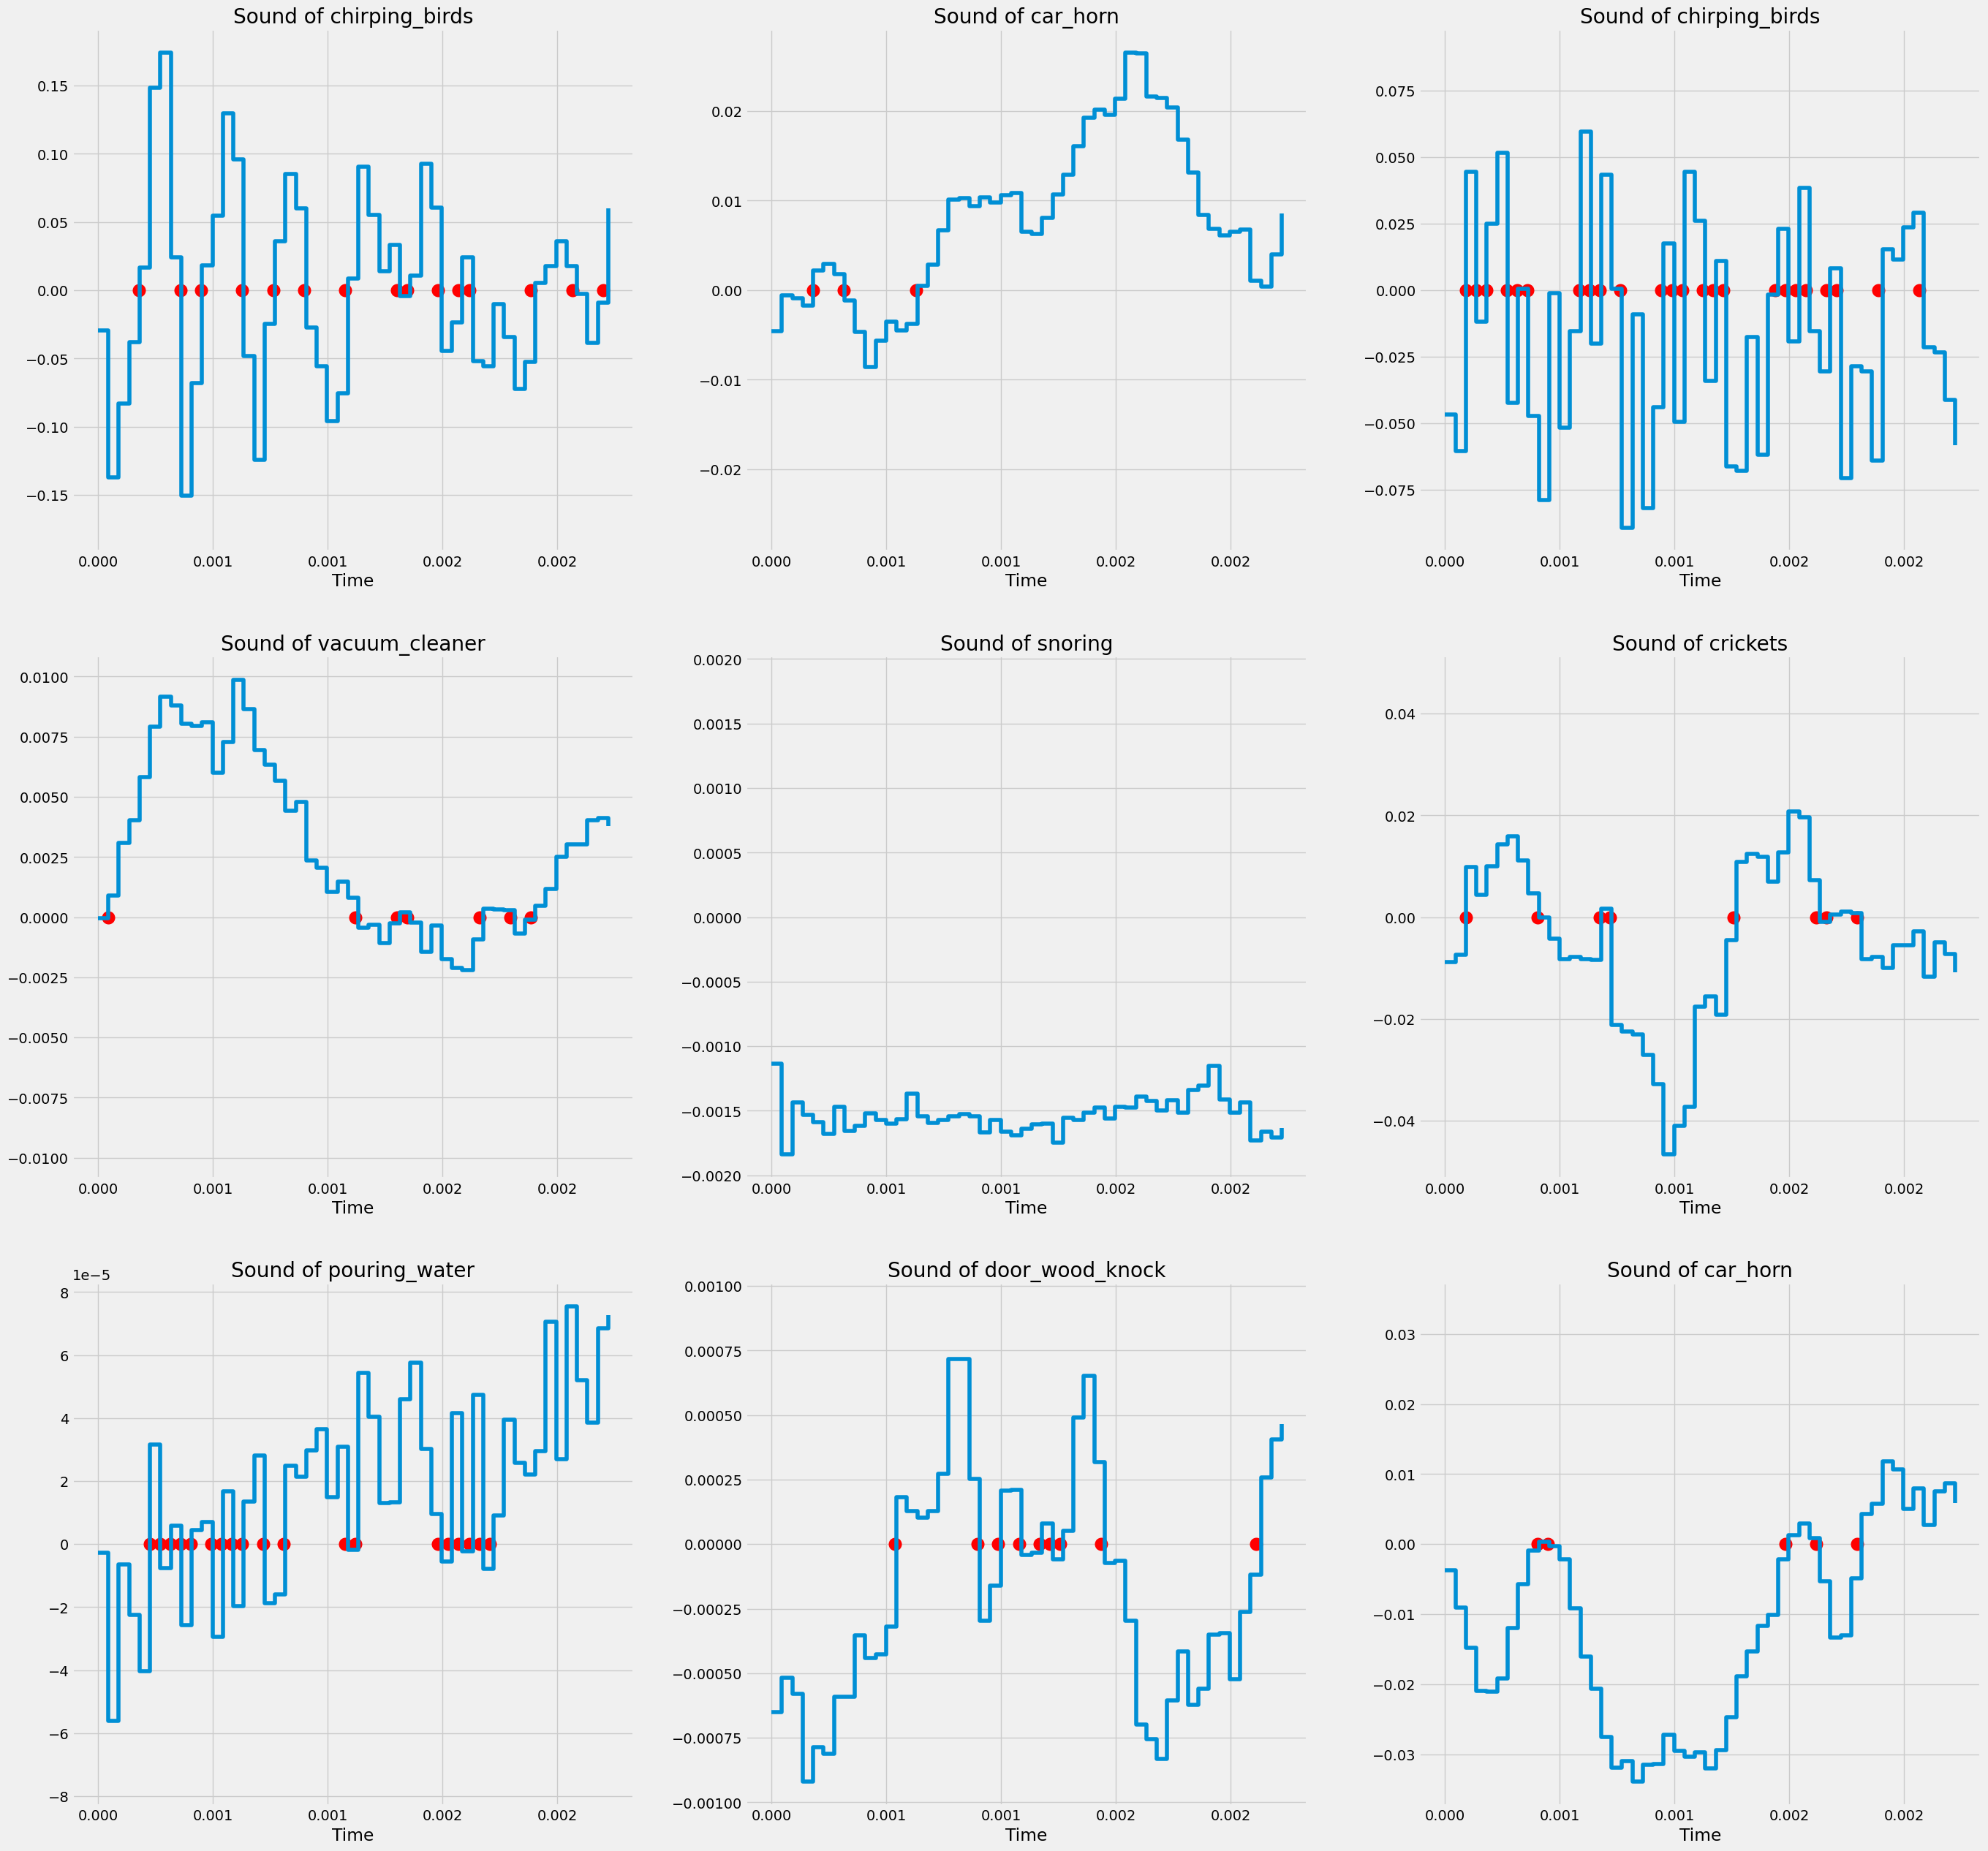

In [12]:
plt.figure(figsize=(30,30))
for i in range(1,10):
    plt.subplot(3,3,i)
    zoom = 50
    y = plot_audios[i][0][0:zoom]
    librosa.display.waveshow(y)
    crossings = librosa.zero_crossings(y, pad=False)
    t = np.linspace(0, 0.0022, num=zoom)
    plt.scatter(t[crossings],y[crossings]*0, color='r',linewidth=7.0)
    try:
        plt.title("Sound of " + decoder[int(plot_files[i][-6:-4])] )
    except:
        plt.title("Sound of " + decoder[int(plot_files[i][-5:-4])] )

Harmonics and Perceptrual

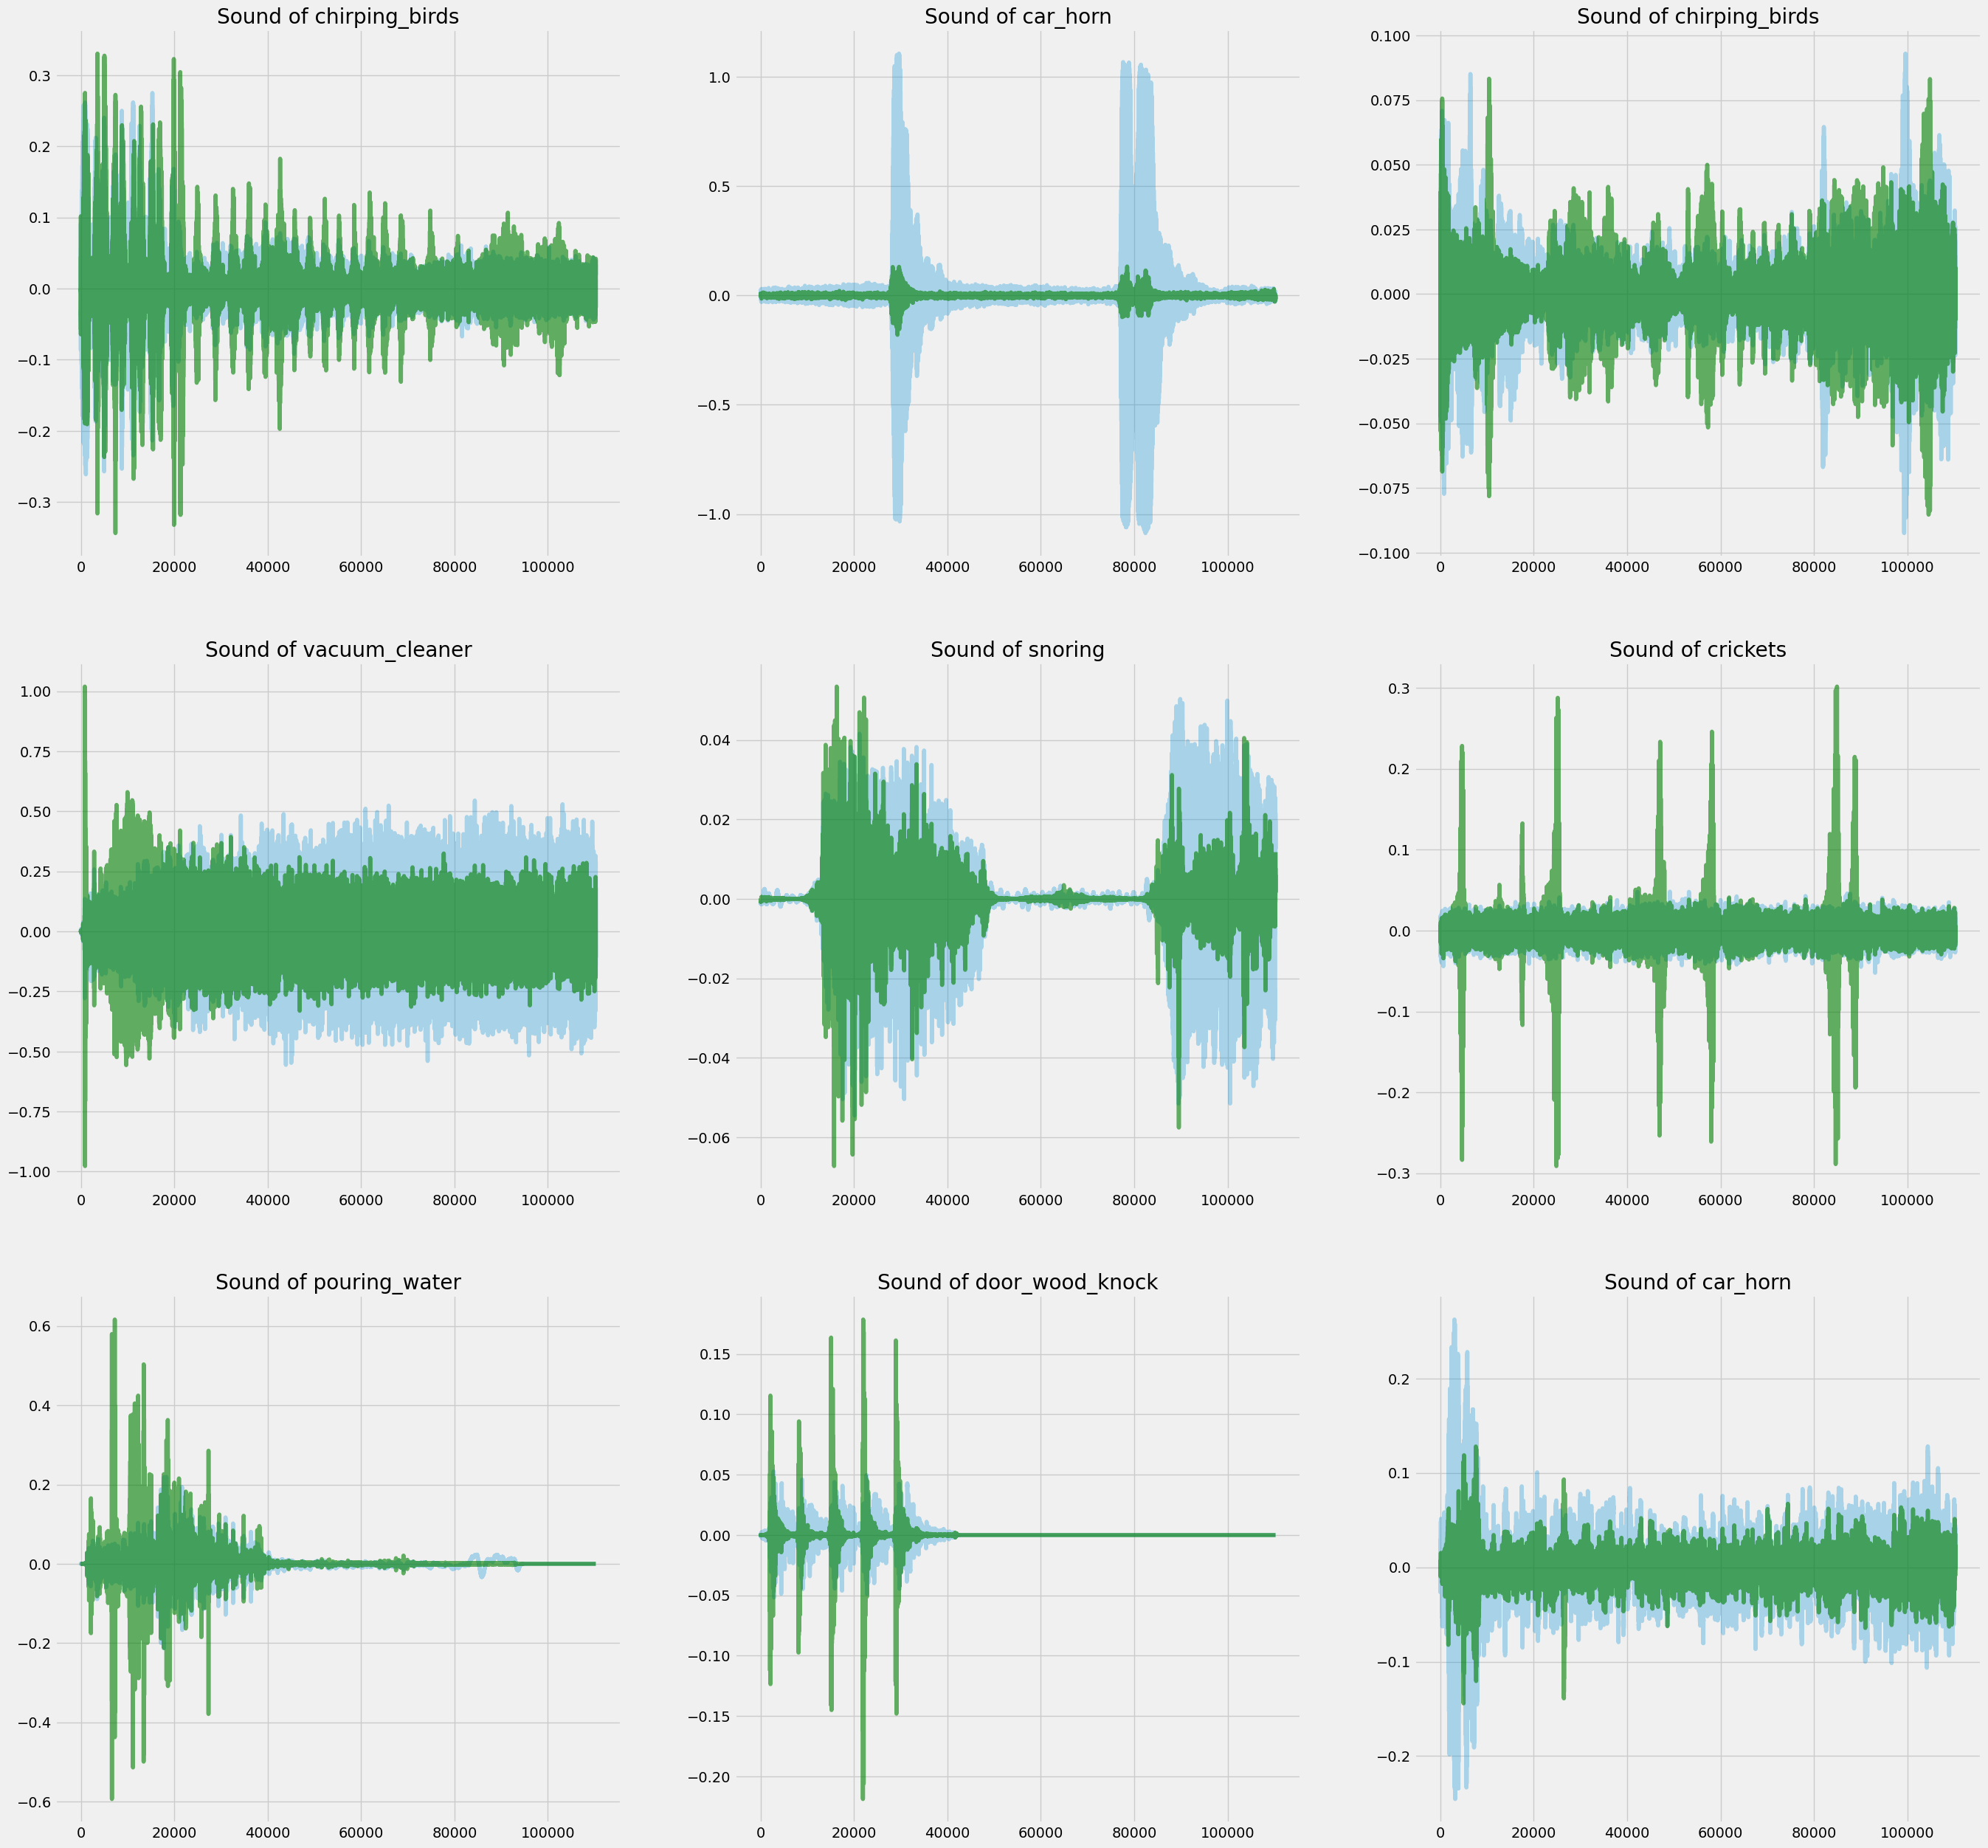

In [13]:
plt.figure(figsize=(30,30))
for i in range(1,10):
    plt.subplot(3,3,i)
    y_harm, y_perc = librosa.effects.hpss(plot_audios[i][0])
    plt.plot(y_harm, alpha=0.3);
    plt.plot(y_perc, color = 'green', alpha=0.6);
    try:
        plt.title("Sound of " + decoder[int(plot_files[i][-6:-4])] )
    except:
        plt.title("Sound of " + decoder[int(plot_files[i][-5:-4])] )

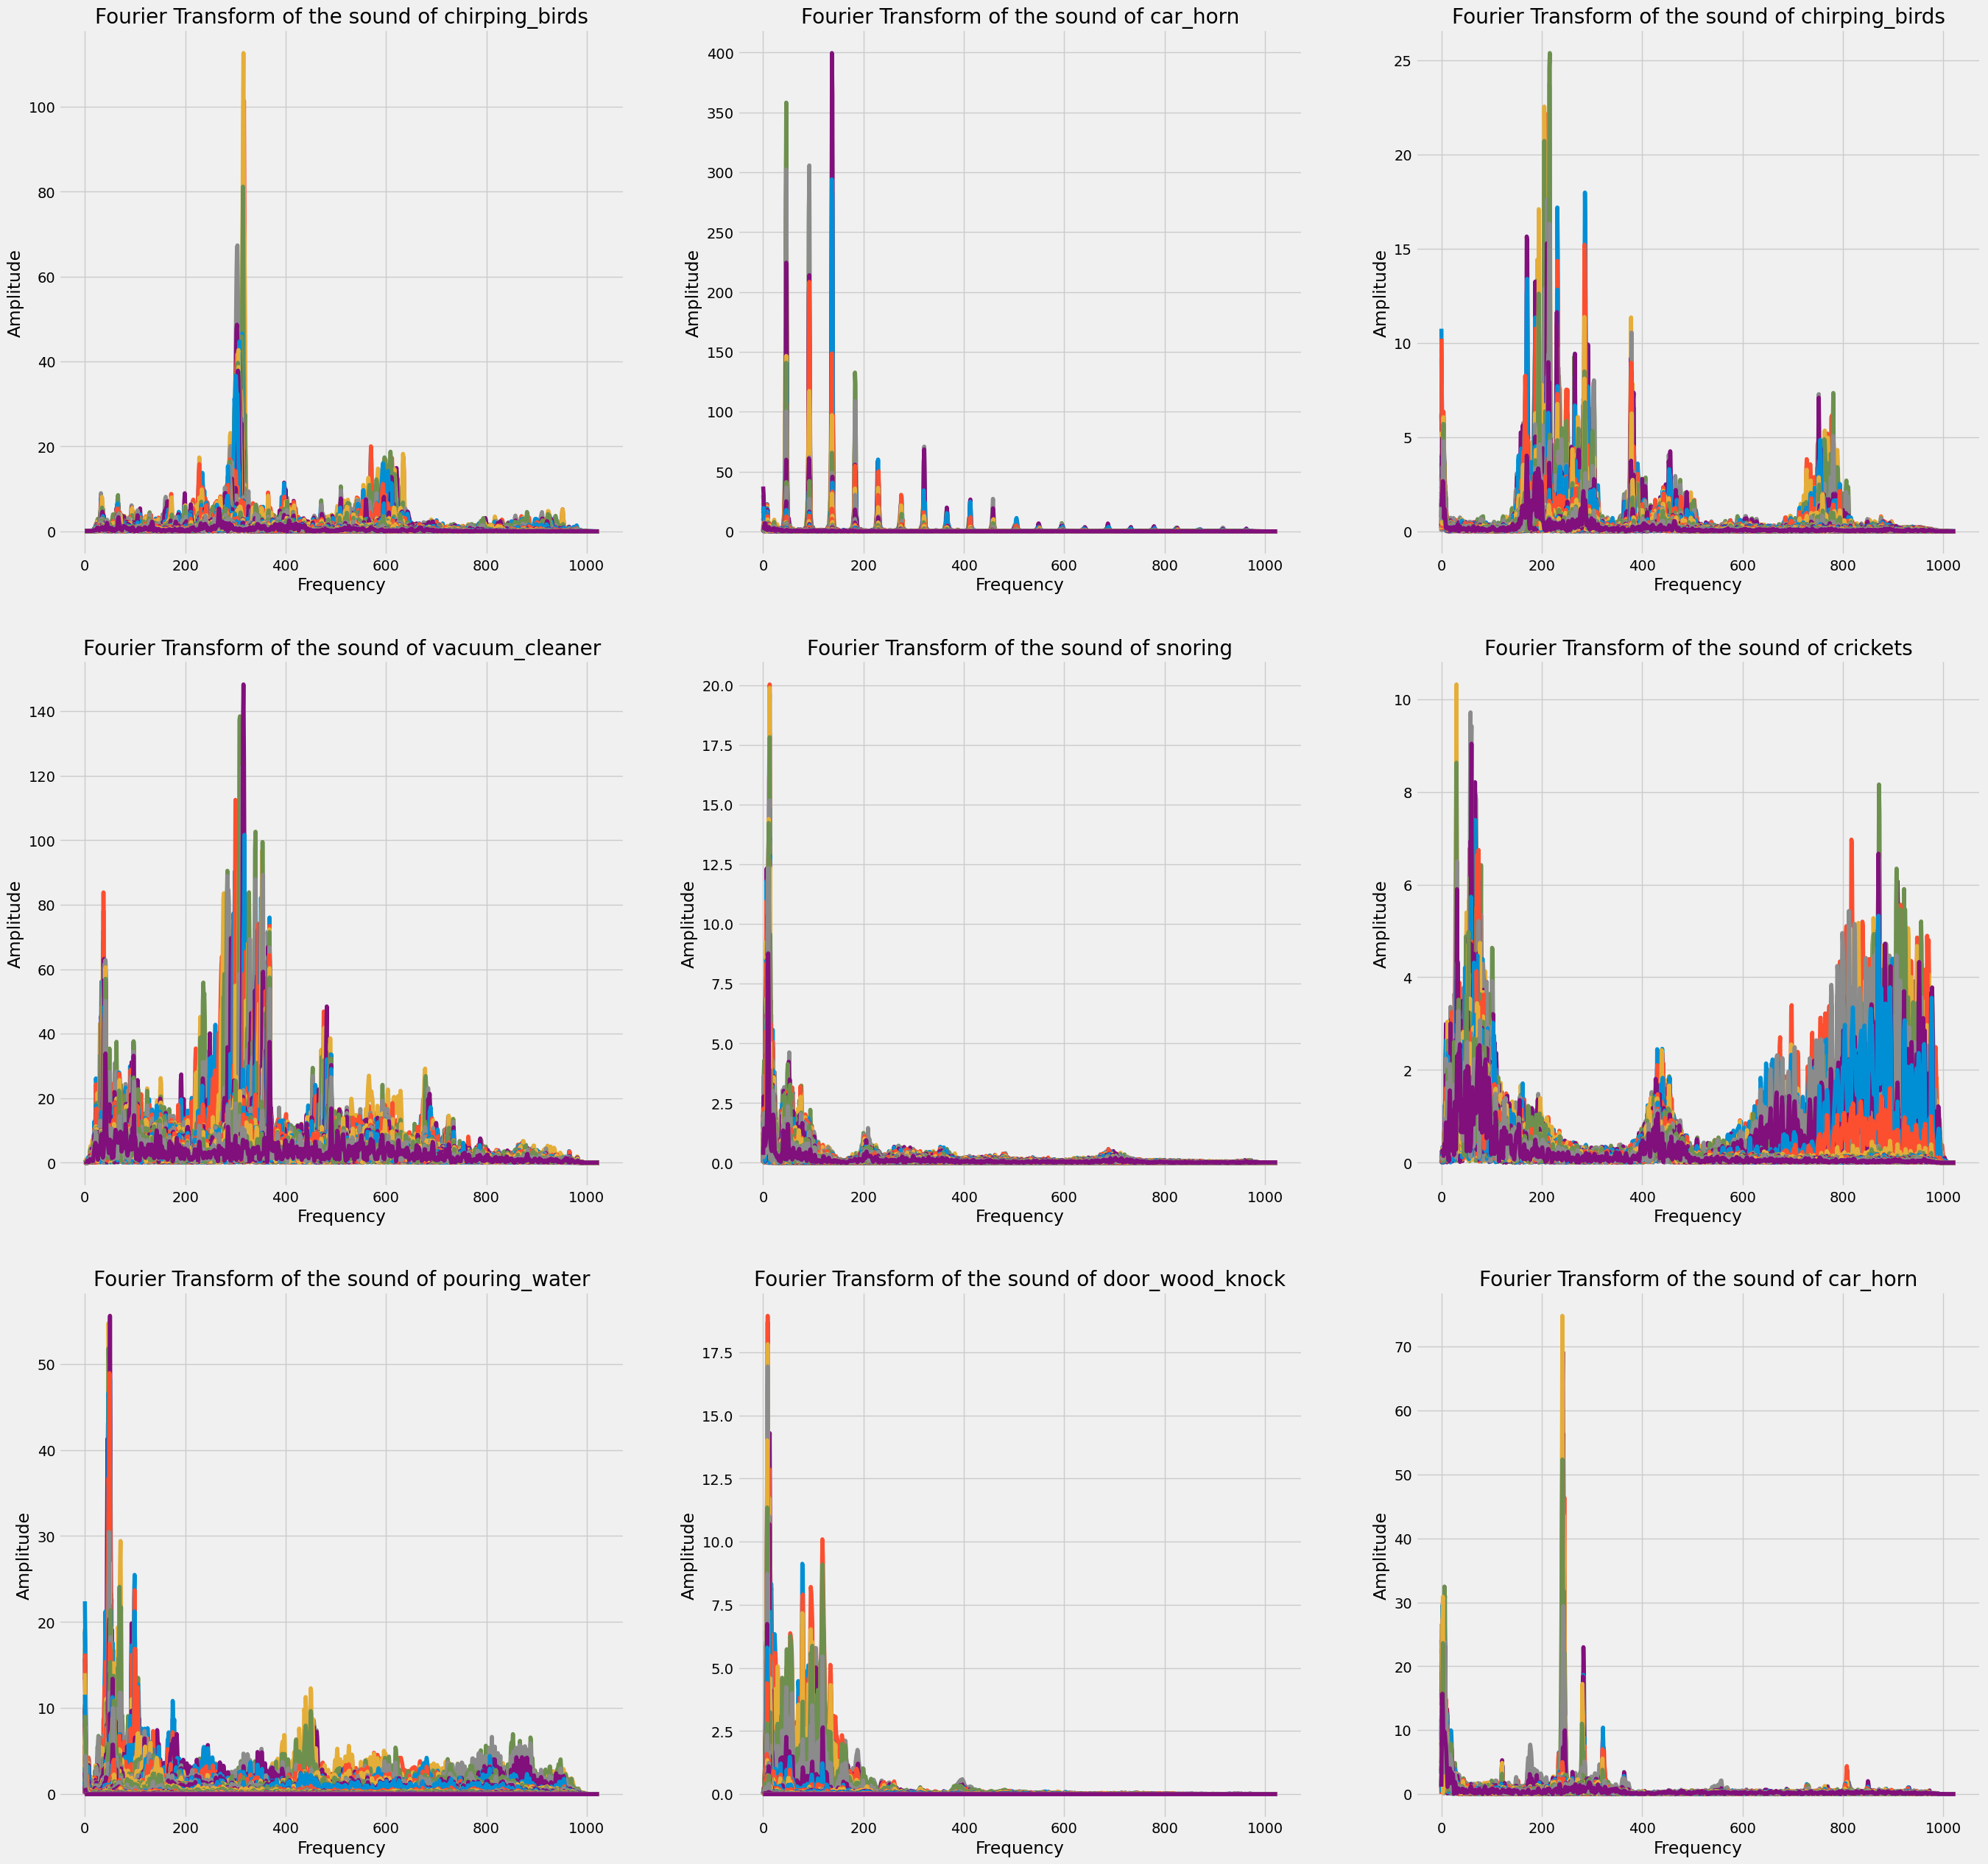

In [14]:
# Default FFT window size
n_fft = 2048 # FFT window size
hop_length = 512 # number audio of frames between STFT columns 

plt.figure(figsize=(30,30))
for i in range(1,10):
    plt.subplot(3,3,i)
    X = np.abs(librosa.stft(plot_audios[i][0], n_fft = n_fft, hop_length = hop_length))
    plt.plot(X)
    plt.xlabel("Frequency")
    plt.ylabel("Amplitude");
    try:
        plt.title("Fourier Transform of the sound of " + decoder[int(plot_files[i][-6:-4])] )
    except:
        plt.title("Fourier Transform of the sound of " + decoder[int(plot_files[i][-5:-4])] )

Data Augmentation

In [15]:
path_audio = "./environmental-sound-classification-50/audio/audio/16000/"

In [16]:
def add_noise(data):
    noise = np.random.normal(0, 0.1, len(data))
    audio_noisy = data + noise
    return audio_noisy
    
def pitch_shifting(data):
    sr  = 16000
    bins_per_octave = 12
    pitch_pm = 2
    pitch_change =  pitch_pm * 2*(np.random.uniform())   
    data = librosa.effects.pitch_shift(data.astype('float64'),  sr, n_steps=pitch_change, 
                                          bins_per_octave=bins_per_octave)
    return pitch_shifting

def random_shift(data):
    timeshift_fac = 0.2 *2*(np.random.uniform()-0.5)  # up to 20% of length
    start = int(data.shape[0] * timeshift_fac)
    if (start > 0):
        data = np.pad(data,(start,0),mode='constant')[0:data.shape[0]]
    else:
        data = np.pad(data,(0,-start),mode='constant')[0:data.shape[0]]
    return data

def volume_scaling(data):
    sr  = 16000
    dyn_change = np.random.uniform(low=1.5,high=2.5)
    data = data * dyn_change
    return data
    
def time_stretching(data, rate=1.5):
    input_length = len(data)
    streching = data.copy()
    streching = librosa.effects.time_stretch(y=streching, rate=rate)
    
    if len(streching) > input_length:
        streching = streching[:input_length]
    else:
        streching = np.pad(data, (0, max(0, input_length - len(streching))), "constant")
    return streching
def audio_augmentation(file, aug):
    directory = 'ESC-50-augmented-data/'
    if not os.path.exists(directory):
        os.makedirs(directory)
    aug = np.array(aug,dtype='float32').reshape(-1,1)
    sf.write(directory+'/'+ file, aug, 16000, 'PCM_24')


In [17]:
def data_aug():
    path_ = np.random.choice(os.listdir(path_audio), size = (2000,), replace= False)
    for k,files in zip(range(len(path_)), path_):
        if files[0] != "5":
            data_, fs = librosa.load(os.path.join(path_audio, files), sr = 16000)
            noise_data = add_noise(data_)
            random_shift_data = random_shift(data_)
            volume_scale_data = volume_scaling(data_)
            time_stretching_data =  time_stretching(data_, rate=1.5)
            aug = [noise_data,time_stretching_data, random_shift_data,volume_scale_data ]
            for j in range(len(aug)):
                filename = (files[0:2]+'generated'+'-'+str(j)+'-'+str(k)+'-'+files[2:])
                audio_augmentation(filename, aug[j])

In [18]:
data_aug()

Data Loader

In [19]:
class DataGenerator(Dataset):
    def __init__(self, indices,items, transform = None, kind='train', test_frac=0.05):
        self.items = items
        if kind=='train':
            self.items = [self.items[i] for i in indices]
        elif kind=='test':
            self.items = [self.items[i] for i in indices]
        self.length = len(self.items)
        print(self.length)
    def __getitem__(self, index):
        filename, label = self.items[index]
        data_tensor, rate = torchaudio.load(filename)
        tmp = data_tensor[0,0:80000]
        return (tmp, int(label))
    
    def __len__(self):
        return self.length

In [20]:
batch_size = 64
test_frac = 0.25
files = Path(path_audio).glob('[1-5]-*')
items = [(str(file), file.name.split('-')[-1].replace('.wav', '')) for file in files]
files = Path('/ESC-50-augmented-data').glob('[1-5]-*')
items += [(str(file), file.name.split('-')[-1].replace('.wav', '')) for file in files]

length = len(items)
indices = np.arange(length)
np.random.shuffle(indices)

split = int(np.floor(test_frac * length))
train_indices, test_indices = indices[split:], indices[:split]

train_data = DataGenerator(train_indices,items, kind='train')
test_data = DataGenerator(test_indices,items, kind='test')

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

1500
500


Model Building

In [21]:
torch.cuda.is_available()

True

In [22]:
# Create a neural net class
class Net(nn.Module):
    
    
    # Defining the Constructor
    def __init__(self, num_classes=50):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=(1,8), stride=(1,1), padding="same")
        self.bn1 = nn.BatchNorm2d(16)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=16, kernel_size=(1,8), stride=(1,1), padding="same")
        self.bn2 = nn.BatchNorm2d(16)
        
        self.pool_1 = nn.MaxPool2d(kernel_size=(1,128), stride = (1,128), padding=0) 
        
        self.conv3 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=(3,3), stride=(1,1), padding=1)
        self.bn3 = nn.BatchNorm2d(32)
        self.conv4 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(3,3), stride=(1,1), padding=1)
        self.bn4 = nn.BatchNorm2d(32)
        
        self.pool_2 = nn.MaxPool2d(kernel_size=4, padding=0) 
            
        self.conv5 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(3,3), stride=(2,2), padding=2)
        self.bn5 = nn.BatchNorm2d(64)
        self.conv6 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3,3), stride=(2,2), padding=1)
        self.bn6 = nn.BatchNorm2d(64)
        
        self.pool_3 = nn.MaxPool2d(kernel_size=2, padding=0) 
        
        self.conv7 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(3,3), stride=(2,2), padding=1)
        self.bn7 = nn.BatchNorm2d(128)
        self.conv8 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=(3,3), stride=(2,2), padding=1)
        self.bn8 = nn.BatchNorm2d(128)
        
        self.pool_4 = nn.MaxPool2d(kernel_size=(1,2), padding=0) 
        
        self.dense = nn.Linear(in_features= 256, out_features=num_classes)
        # Define proportion or neurons to dropout
        self.dropout = nn.Dropout(0.2)
        
        

    def forward(self, x):
        x = x.unsqueeze(1).view(-1, 1, 1, 80000)
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.dropout(x)
        x = F.relu(self.bn2(self.conv2(x)))
        x = self.dropout(x)
        x = self.pool_1(x)
        x = x.view((-1,1,16, 625))
        x = F.relu(self.bn3(self.conv3(x)))
        x = self.dropout(x)
        x = F.relu(self.bn4(self.conv4(x)))
        x = self.dropout(x)
        x = self.pool_2(x)
        x = F.relu(self.bn5(self.conv5(x)))
        x = self.dropout(x)
        x = F.relu(self.bn6(self.conv6(x)))
        x = self.dropout(x)
        x = self.pool_3(x)
        x = F.relu(self.bn7(self.conv7(x)))
        x = self.dropout(x)
        x = F.relu(self.bn8(self.conv8(x)))
        x = self.dropout(x)
        x = self.pool_4(x)
        x = x.view(x.size(0),-1)
        x = self.dense(x)
        x = self.dropout(x)
        return x
    
device = "cpu"
if (torch.cuda.is_available()):
    # if GPU available, use cuda (on a cpu, training will take a considerable length of time!)
    device = "cuda"

In [23]:
plt.figure(figsize=(20,15))

<Figure size 2000x1500 with 0 Axes>

<Figure size 2000x1500 with 0 Axes>

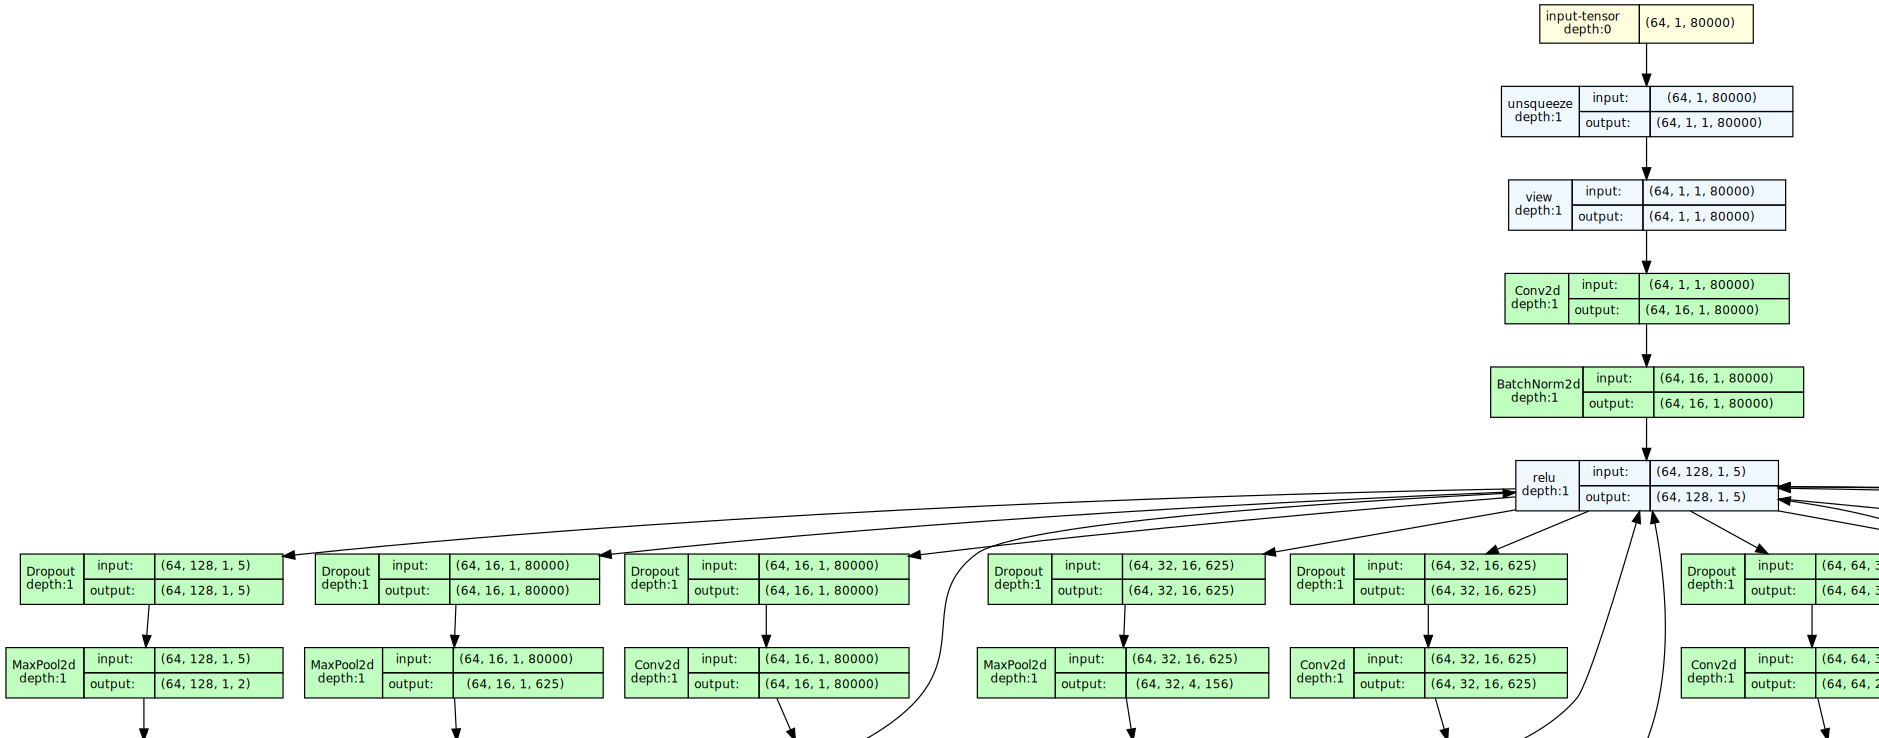

In [24]:
model = Net(num_classes=50).to(device)
input_data = torch.randn(64, 1, 80000)
model_graph = draw_graph(model,input_data, roll=True)
model_graph.visual_graph

In [25]:
# Create an instance of the model class and allocate it to the device
summary(model,(1,80000))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 1, 80000]             144
       BatchNorm2d-2         [-1, 16, 1, 80000]              32
           Dropout-3         [-1, 16, 1, 80000]               0
            Conv2d-4         [-1, 16, 1, 80000]           2,064
       BatchNorm2d-5         [-1, 16, 1, 80000]              32
           Dropout-6         [-1, 16, 1, 80000]               0
         MaxPool2d-7           [-1, 16, 1, 625]               0
            Conv2d-8          [-1, 32, 16, 625]             320
       BatchNorm2d-9          [-1, 32, 16, 625]              64
          Dropout-10          [-1, 32, 16, 625]               0
           Conv2d-11          [-1, 32, 16, 625]           9,248
      BatchNorm2d-12          [-1, 32, 16, 625]              64
          Dropout-13          [-1, 32, 16, 625]               0
        MaxPool2d-14           [-1, 32,

Training Model

In [26]:
def train(model, device, train_loader, optimizer, epoch):
    # Set the model to training mode
    model.train()
    train_loss = 0
    print("------------------------------- Epoch:", epoch,"-------------------------------")
    # Process the images in batches
    for batch_idx, (data, target) in enumerate(train_loader):
        # Use the CPU or GPU as appropriate
        # Recall that GPU is optimized for the operations we are dealing with
        data, target = data.to(device), target.to(device)

        # Reset the optimizer
        optimizer.zero_grad()

        # Push the data forward through the model layers
        output = model(data.to(device))

        # Get the loss
        loss = loss_criteria(output, target)

        # Keep a running total
        train_loss += loss.item()

        # Backpropagate
        loss.backward(retain_graph=True)
        optimizer.step()

        # Print metrics so we see some progress
        #print('\tTraining batch {} Loss: {:.6f}'.format(batch_idx + 1, loss.item()))
            
    # return average loss for the epoch
    avg_loss = train_loss / (batch_idx+1)
    print('Training set: Average loss: {:.6f}'.format(avg_loss))
    return avg_loss

Testing Model

In [27]:
predicted_audio = []

In [28]:
def test(model, device, test_loader):
    # Switch the model to evaluation mode (so we don't backpropagate or drop)
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        batch_count = 0
        for data, target in test_loader:
            batch_count += 1
            data, target = data.to(device), target.to(device)
            
            # Get the predicted classes for this batch
            output = model(data)
            
            # Calculate the loss for this batch
            test_loss += loss_criteria(output, target).item()
            
            # Calculate the accuracy for this batch
            _, predicted = torch.max(output.data, 1)
            predicted_audio.append(predicted)
            correct += torch.sum(target==predicted).item()

    # Calculate the average loss and total accuracy for this epoch
    avg_loss = test_loss / batch_count
    print('Testing set: Average loss: {:.6f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        avg_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    
    # return average loss for the epoch
    return avg_loss, predicted_audio

Evaluating the model

In [29]:
def training(model):
    # Use an "Adam" optimizer to adjust weights
    optimizer = optim.Adam(model.parameters(), lr=3e-4)

    # Specify the loss criteria
    loss_criteria = nn.CrossEntropyLoss()

    # Track metrics in these arrays
    epoch_nums = []
    training_loss = []
    testing_loss = []
    pred_audios = []

    epochs = 100
    print('Training on', device)
    best_test_loss = float('inf')
    patience = 5
    patience_counter = 0
    for epoch in tqdm(range(1, epochs + 1)):
        train_loss = train(model, device, train_loader, optimizer, epoch)
        test_loss, predicted_audio_records = test(model, device, test_loader)
        pred_audios.append(predicted_audio_records)
        if test_loss < best_test_loss:
            best_test_loss = test_loss
            patience_counter = 0
            torch.save(model.state_dict(), 'best_model.pt')
        else:
            patience_counter += 1
        epoch_nums.append(epoch)
        training_loss.append(train_loss)
        testing_loss.append(test_loss)
        # if patience_counter >= patience:
        #     print(f'Early stopping after {epoch} epochs')
        #     break
    return pred_audios

In [30]:
loss_criteria = nn.CrossEntropyLoss()
predicted_audios = training(model)

Training on cuda


  0%|          | 0/100 [00:00<?, ?it/s]

------------------------------- Epoch: 1 -------------------------------
Training set: Average loss: 3.999638
Testing set: Average loss: 3.921479, Accuracy: 7/500 (1%)

------------------------------- Epoch: 2 -------------------------------
Training set: Average loss: 3.813745
Testing set: Average loss: 3.925739, Accuracy: 10/500 (2%)

------------------------------- Epoch: 3 -------------------------------
Training set: Average loss: 3.711573
Testing set: Average loss: 3.864181, Accuracy: 14/500 (3%)

------------------------------- Epoch: 4 -------------------------------
Training set: Average loss: 3.584954
Testing set: Average loss: 3.780668, Accuracy: 16/500 (3%)

------------------------------- Epoch: 5 -------------------------------
Training set: Average loss: 3.462228
Testing set: Average loss: 3.749664, Accuracy: 18/500 (4%)

------------------------------- Epoch: 6 -------------------------------
Training set: Average loss: 3.406288
Testing set: Average loss: 3.743712, Accu